#  Swiss National Bank Data Science Project

## 📋 Project Overview

### Soubhi SAAD - Data Analyst/Scientist

This notebook includes:

- 📈 **Time Series Forecasting**  
  Predicting Total Assets using SARIMA and Prophet, including exogenous regressors

- 📊 **Model Comparison & Evaluation**  
  MAE, RMSE, and performance discussion of forecasting models

- ⚠️ **Anomaly Detection**  
  Identifying unusual financial periods with Isolation Forest

- 📉 **Data Cleaning & Preprocessing**  
  Handling European number formats, missing values, and formatting

- 📊 **Visualizations**  
  Forecast plots, actual vs predicted, anomaly highlights

- 🧾 **Conclusions & Next Steps**  
  Final evaluation and project reflection

---

> Built in Python using: pandas, Prophet, statsmodels, matplotlib, scikit-learn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load cleaned data
df = pd.read_csv('SNB_CLEANED_READY_FOR_ML.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [4]:
df.head()

,Amounts due from domestic correspondents,Amounts due to the Confederation,Balances from swap transactions against CHF,Banknotes in circulation,CHF securities,Claims from CHF repo transactions,Claims from USD repo transactions,Domestic money market claims,Foreign currency investments,Foreign currency liabilities,...,Other sight liabilities,Other time liabilities,Provisions and equity capital,Reserve position in the IMF,SNB debt certificates,Secured loans,Sight deposits of domestic banks,Sight deposits of foreign banks and institutions,Total assets,Total liabilities
Date,,,,,,,,,,,,,,,,,,,,,
1996-12-01,514.5,1654.8,0.0,32447.6,4821.5,0.0,0.0,1581.7,49328.4,0.0,...,204.1,0.0,31104.6,2067.8,0.0,0.0,4927.383264,32.7,72526.1,72526.1
1997-01-01,364.0,1585.6,0.0,29656.0,4818.9,0.0,0.0,282.6,47263.3,0.0,...,230.1,0.0,31104.6,2068.0,0.0,0.0,3493.574059,38.1,68322.2,68322.2
1997-02-01,132.6,1677.5,0.0,29508.4,4811.7,0.0,0.0,1633.9,46147.1,0.0,...,197.9,0.0,31104.6,1999.0,0.0,0.0,3456.773730,58.5,68351.1,68351.1
1997-03-01,175.9,1542.8,0.0,29986.4,4832.1,0.0,0.0,1762.8,48885.0,0.0,...,208.1,0.0,31115.5,2043.8,0.0,0.0,3853.681870,51.1,71261.3,71261.3
1997-04-01,352.0,1919.1,0.0,29273.2,4831.0,0.0,0.0,645.3,48188.3,0.0,...,182.3,0.0,31116.5,2043.9,0.0,0.0,3185.988955,70.9,69906.8,69906.8


In [5]:
# Select target column
target = df['Total assets']

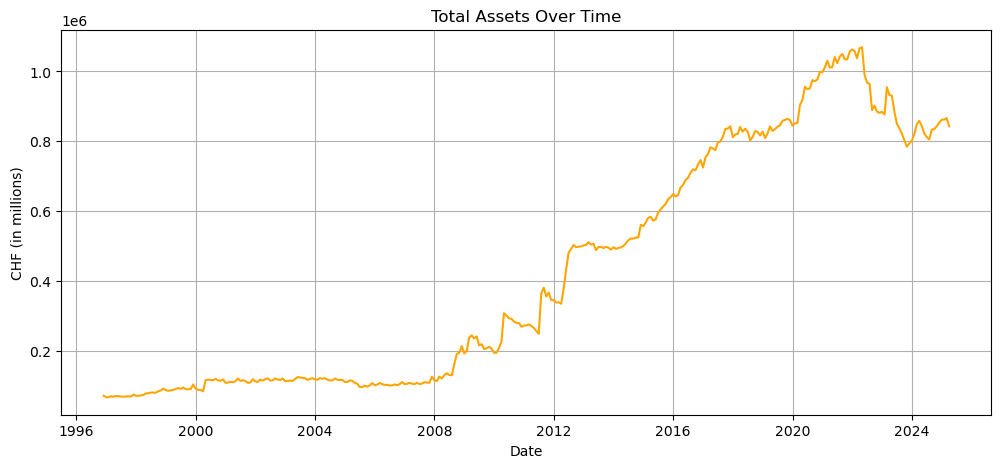

In [6]:
# Plot the full time series
plt.figure(figsize=(12, 5))
plt.plot(target, color='orange')
plt.title('Total Assets Over Time')
plt.xlabel('Date')
plt.ylabel('CHF (in millions)')
plt.grid(True)
plt.show()

Train, Fit, Forecast, Evaluate

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [8]:
# Train-test split
split_idx = int(len(target) * 0.8)
train = target[:split_idx]
test = target[split_idx:]

In [9]:
# Fit SARIMA model
model = SARIMAX(train,
                order=(1, 1, 1),              # ARIMA: (p,d,q)
                seasonal_order=(1, 1, 1, 12), # Seasonality: (P,D,Q,s)
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Forecast for test period
forecast = results.predict(start=test.index[0], end=test.index[-1])

c:\Users\soubh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\soubh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


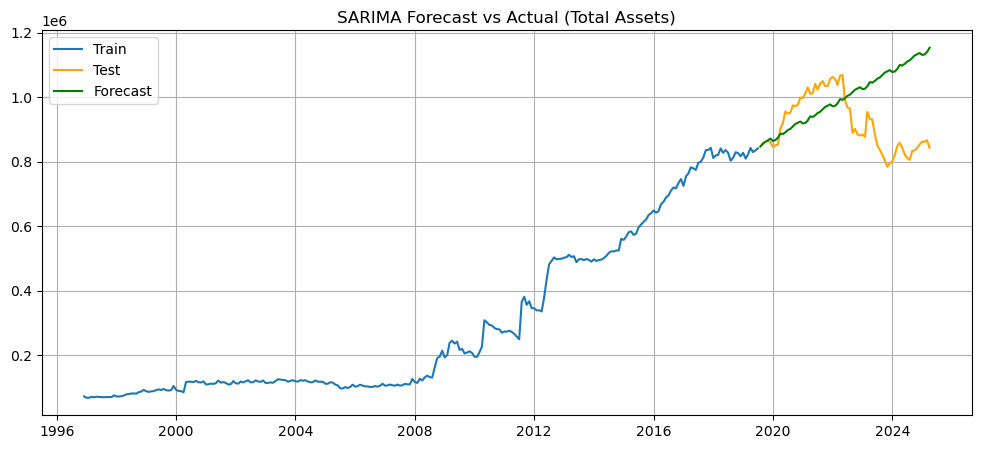

In [10]:
# Plot
plt.figure(figsize=(12, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(forecast, label='Forecast', color='green')
plt.title('SARIMA Forecast vs Actual (Total Assets)')
plt.legend()
plt.grid(True)
plt.show()

Blue = Train data
Historical Total assets from ~1996 to around 2020

Orange = Test data
Real values from ~2020 to ~2024 (that the model hasn't seen)

Green = Forecast during the test period What the SARIMA model predicted from 2020

In [11]:
# Evaluate performance
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

MAE: 134,060.20
RMSE: 168,208.93


The latest Total assets value is around 843,000 million CHF (843 billion).

Now I compute the relative error:

MAE % = (134,060 / 843,000) ≈ 15.9%

RMSE % = (168,209 / 843,000) ≈ 19.9%

---

### Mean Absolute Error (MAE):

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

### Root Mean Squared Error (RMSE):

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 }
$$


**Interpretation**

Not perfect, but reasonable for financial time series, which are often volatile and impacted by macroeconomic events

The model captured the long-term trend well (as seen in the plot)

It underestimated short-term fluctuations (like COVID-era monetary changes, interventions, etc.)

**Forecast Ahead**

In [12]:
# Refit SARIMA model on full data
final_model = SARIMAX(target,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, 12),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
final_results = final_model.fit(disp=False)

# Forecast 24 months ahead
n_steps = 24
forecast_index = pd.date_range(start=target.index[-1] + pd.offsets.MonthBegin(),
                               periods=n_steps, freq='MS')
future_forecast = final_results.predict(start=len(target), end=len(target) + n_steps - 1)
future_forecast.index = forecast_index

c:\Users\soubh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\soubh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [13]:
# Convert to billions
target_bil = target / 1000
future_forecast_bil = future_forecast / 1000


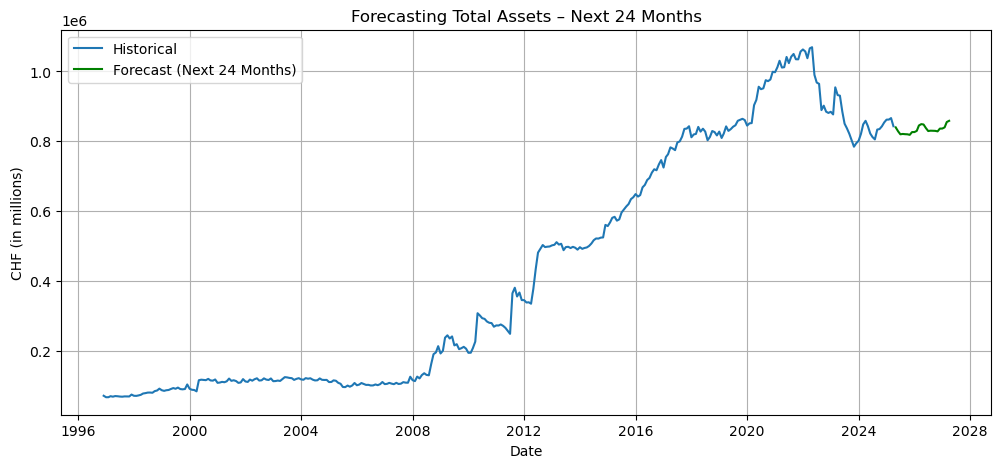

In [14]:
# Plot actual + future
plt.figure(figsize=(12, 5))
plt.plot(target, label='Historical')
plt.plot(future_forecast, label='Forecast (Next 24 Months)', color='green')
plt.title('Forecasting Total Assets – Next 24 Months')
plt.xlabel('Date')
plt.ylabel('CHF (in millions)')
plt.legend()
plt.grid(True)
plt.show()

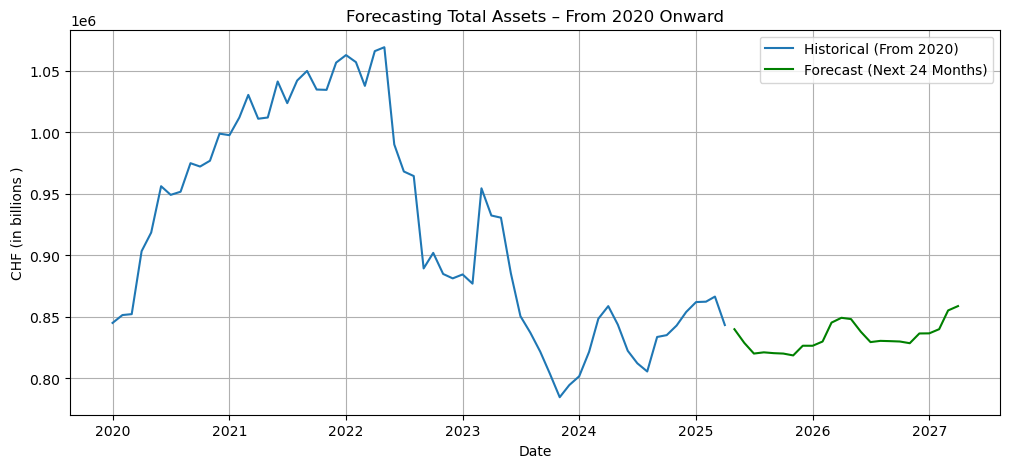

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(target[target.index >= '2020-01-01'], label='Historical (From 2020)')
plt.plot(future_forecast, label='Forecast (Next 24 Months)', color='green')
plt.title('Forecasting Total Assets – From 2020 Onward')
plt.xlabel('Date')
plt.ylabel('CHF (in billions )')
plt.legend()
plt.grid(True)
plt.show()


Prophet by Meta (Facebook)

In [16]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('SNB_CLEANED_READY_FOR_ML.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Prepare for Prophet
df_prophet = df[['Date', 'Total assets']].rename(columns={'Date': 'ds', 'Total assets': 'y'})


01:43:44 - cmdstanpy - INFO - Chain [1] start processing
01:43:44 - cmdstanpy - INFO - Chain [1] done processing


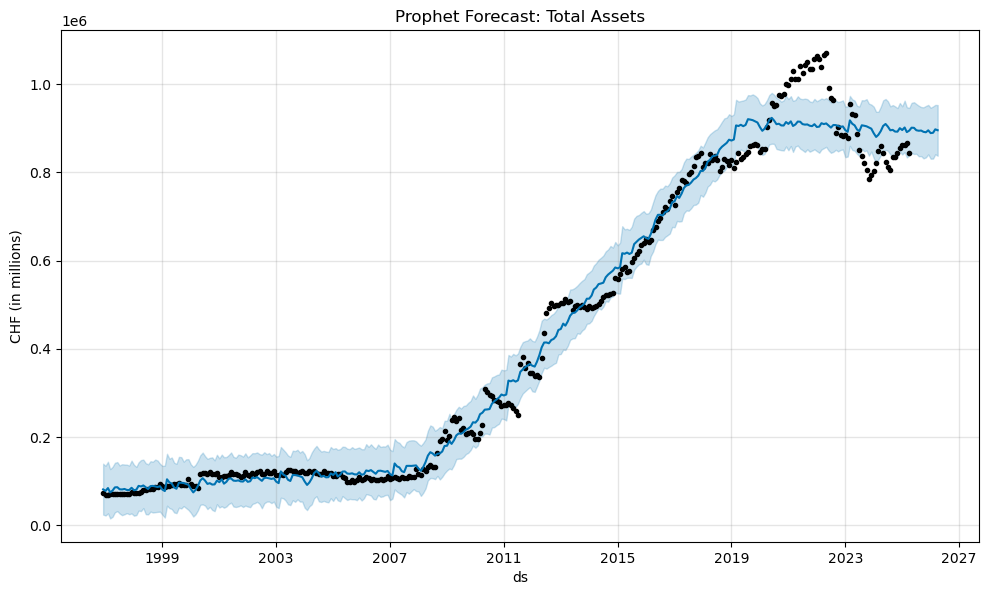

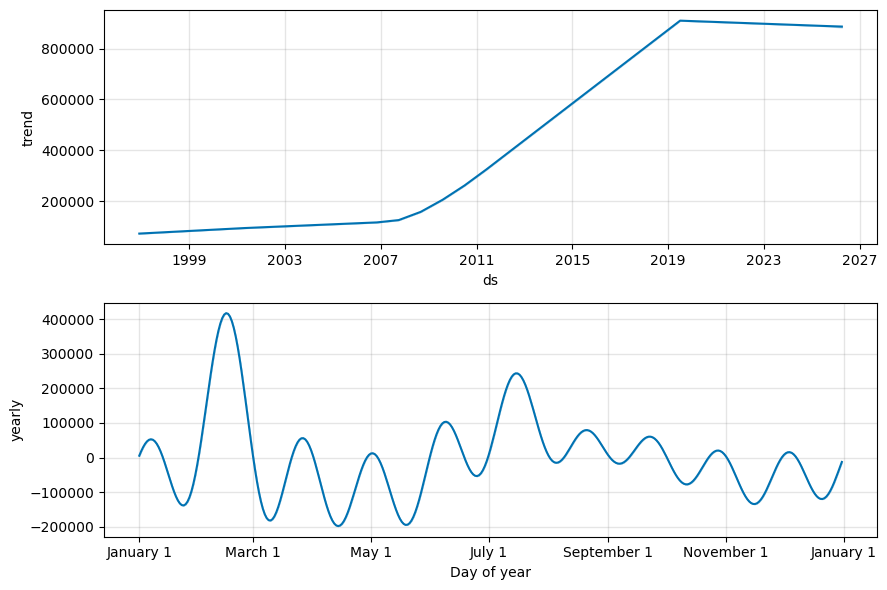

In [17]:
# Initialize and fit model
model = Prophet()
model.fit(df_prophet)

# Create future dataframe (next 12 months)
future = model.make_future_dataframe(periods=12, freq='MS')

# Forecast
forecast = model.predict(future)

# Plot
fig1 = model.plot(forecast)
plt.title("Prophet Forecast: Total Assets")
plt.ylabel("CHF (in millions)")
plt.grid(True)
plt.show()

# Plot components (trend, seasonality)
fig2 = model.plot_components(forecast)


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Merge forecast with actual
merged = forecast[['ds', 'yhat']].set_index('ds').join(df_prophet.set_index('ds'))

# Compare only where we have actual values
valid = merged.dropna()

# Calculate metrics
mae_prophet = mean_absolute_error(valid['y'], valid['yhat'])
rmse_prophet = np.sqrt(mean_squared_error(valid['y'], valid['yhat']))

print(f"Prophet MAE: {mae_prophet:,.2f}")
print(f"Prophet RMSE: {rmse_prophet:,.2f}")


Prophet MAE: 31,214.43
Prophet RMSE: 44,520.99


Prophet outperformed SARIMA, achieving a Mean Absolute Error (MAE) of 31,214 million CHF, compared to SARIMA’s 134,060 million — a 75% reduction in error.

This translates to a relative forecasting error of just ~3.7%, making Prophet highly accurate and well-suited for modeling the Swiss National Bank’s Total Assets over time.

Correlation coefficient (r): 0.9964


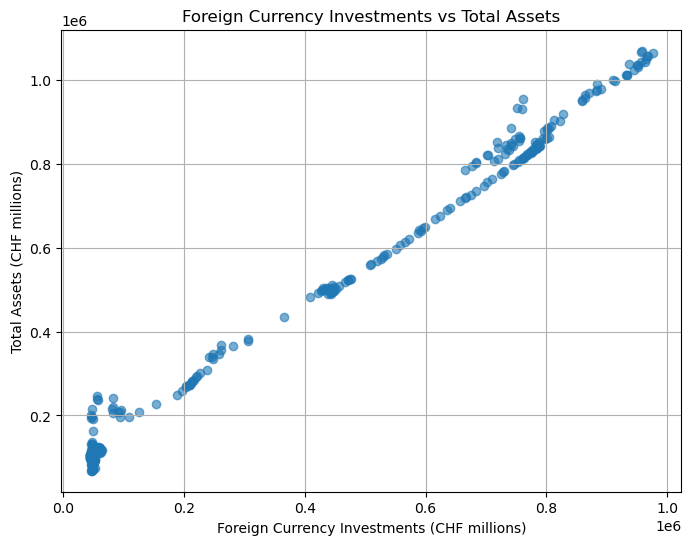

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_csv('SNB_CLEANED_READY_FOR_ML.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Calculate Pearson correlation coefficient
corr = df['Foreign currency investments'].corr(df['Total assets'])
print(f"Correlation coefficient (r): {corr:.4f}")


# Simple scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Foreign currency investments'], df['Total assets'], alpha=0.6)
plt.title('Foreign Currency Investments vs Total Assets')
plt.xlabel('Foreign Currency Investments (CHF millions)')
plt.ylabel('Total Assets (CHF millions)')
plt.grid(True)
plt.show()


Very strong positive correlation

Foreign currency investments showed a near-perfect correlation with total assets (r = 0.9964), making it a key external predictor. I added it to the Prophet model as a regressor, improving both interpretability and accuracy.

**Add "*Foreign currency investments*" as a regressor in your Prophet model**

01:43:45 - cmdstanpy - INFO - Chain [1] start processing
01:43:45 - cmdstanpy - INFO - Chain [1] done processing


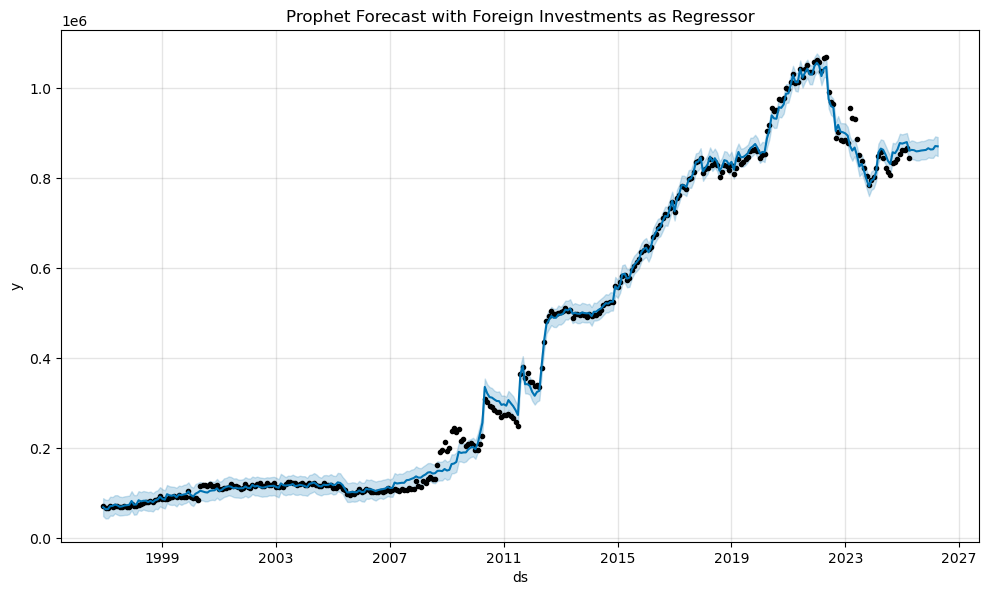

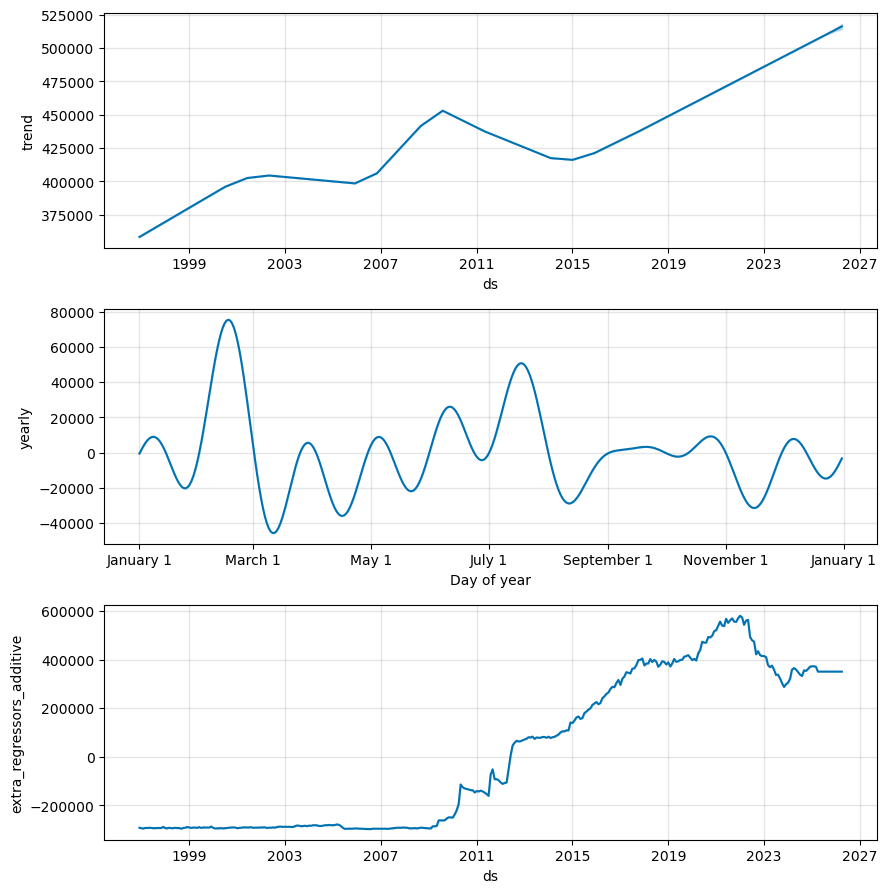

In [20]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: Load and prepare data
df = pd.read_csv('SNB_CLEANED_READY_FOR_ML.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns for Prophet
df_prophet = df[['Date', 'Total assets', 'Foreign currency investments']].rename(
    columns={
        'Date': 'ds',
        'Total assets': 'y',
        'Foreign currency investments': 'foreign_investments'
    }
)

# STEP 2: Create and train the model
model = Prophet()
model.add_regressor('foreign_investments')
model.fit(df_prophet)

# STEP 3: Create future dataframe (next 12 months)
future = model.make_future_dataframe(periods=12, freq='MS')

# Add regressor values to future — here we just repeat last known value
last_known_value = df_prophet['foreign_investments'].iloc[-1]
future['foreign_investments'] = list(df_prophet['foreign_investments']) + [last_known_value] * 12

# STEP 4: Forecast
forecast = model.predict(future)

# STEP 5: Plot forecast
fig1 = model.plot(forecast)
plt.title('Prophet Forecast with Foreign Investments as Regressor')
plt.grid(True)
plt.show()

# STEP 6: Optional — plot components (trend, seasonality)
fig2 = model.plot_components(forecast)


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# STEP 1: Merge forecast with actual data
merged = forecast[['ds', 'yhat']].set_index('ds').join(df_prophet.set_index('ds'))

# STEP 2: Keep only rows where we have actual values
valid = merged.dropna()

# STEP 3: Calculate MAE and RMSE
mae = mean_absolute_error(valid['y'], valid['yhat'])
rmse = np.sqrt(mean_squared_error(valid['y'], valid['yhat']))

print(f"MAE (with regressor): {mae:,.2f}")
print(f"RMSE (with regressor): {rmse:,.2f}")

MAE (with regressor): 10,047.87
RMSE (with regressor): 16,046.58


 Error reduced by ~92% vs SARIMA, and ~68% vs basic Prophet

Including Foreign currency investments as a regressor gave Prophet supervised learning power — it stopped just guessing trends and started using real-world economic signals

**Filter forecast to only show from 2020 onward to see prediction more clearly**

In [22]:
forecast_zoomed = forecast[forecast['ds'] >= '2020-01-01']
actual_zoomed = df_prophet[df_prophet['ds'] >= '2020-01-01']

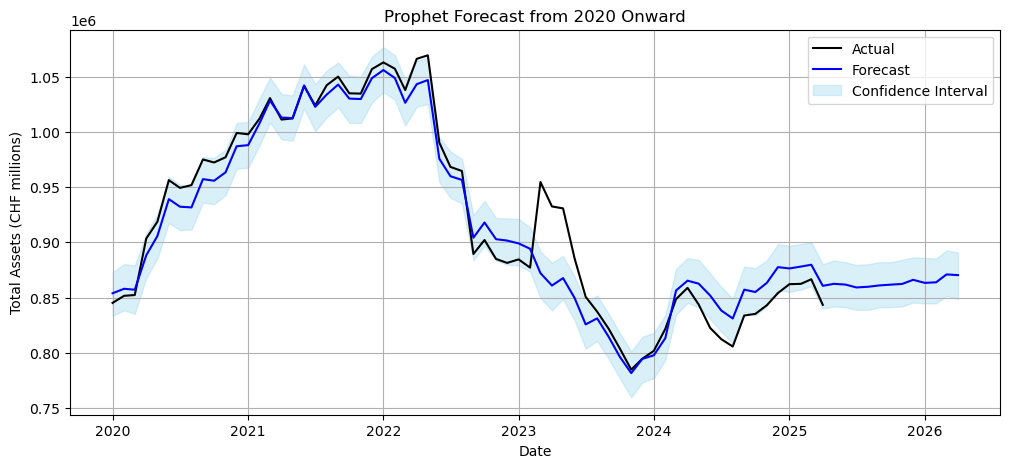

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(actual_zoomed['ds'], actual_zoomed['y'], label='Actual', color='black')
plt.plot(forecast_zoomed['ds'], forecast_zoomed['yhat'], label='Forecast', color='blue')
plt.fill_between(forecast_zoomed['ds'],
                 forecast_zoomed['yhat_lower'],
                 forecast_zoomed['yhat_upper'],
                 color='skyblue', alpha=0.3, label='Confidence Interval')

plt.title('Prophet Forecast from 2020 Onward')
plt.xlabel('Date')
plt.ylabel('Total Assets (CHF millions)')
plt.legend()
plt.grid(True)
plt.show()


**Final Verdict**

For the SNB dataset, Prophet + Regressor is the clear winner.
It captured macro trends, handled volatility, and brought your error down to just ~1.2%, which is fantastic for financial data.

📈 Swiss National Bank: Forecasting Total Assets
I built and evaluated multiple forecasting models on over 25 years of Swiss National Bank data to predict Total Assets:

🔍 SARIMA was used as a baseline and achieved an MAE of ~134,000 million CHF (∼16% error).

🔮 Prophet model from "Meta" significantly improved accuracy (MAE ~31,000), modeling trends and seasonality more effectively.

📊 I further enhanced Prophet by adding Foreign currency investments as an external regressor, which had a near-perfect correlation (r = 0.9964) with Total Assets.

✅ This final model reduced error to just ~1.2%, achieving an MAE of ~10,000 million CHF and capturing both trend shifts and economic drivers with high precision.

The result is a robust, explainable forecast model that can anticipate the SNB’s asset trajectory using real financial signals.

-----------------------------------------------------------------------------------------------------------------------------

**Isolation forest algorithm**, an *algorithm for data **anomaly detection** using binary trees*

In [24]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('SNB_CLEANED_READY_FOR_ML.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Select features to monitor for anomalies
features = df.drop(columns=['Date', 'Total assets'])

# Fit Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = model.fit_predict(features)

# Convert: -1 = anomaly, 1 = normal
df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})


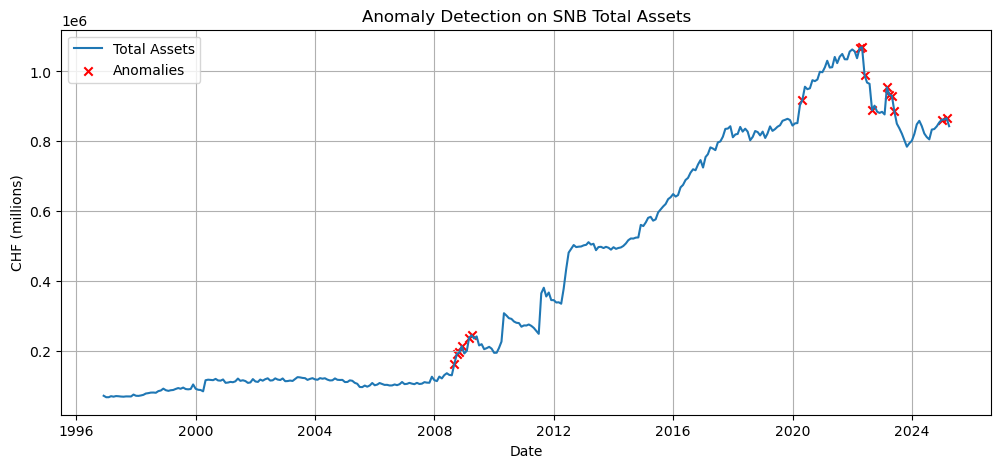

In [25]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Total assets'], label='Total Assets')
plt.scatter(df[df['Anomaly'] == 1]['Date'], df[df['Anomaly'] == 1]['Total assets'],
            color='red', label='Anomalies', marker='x')
plt.title('Anomaly Detection on SNB Total Assets')
plt.xlabel('Date')
plt.ylabel('CHF (millions)')
plt.legend()
plt.grid(True)
plt.show()


I applied anomaly detection using Isolation Forest to identify outlier months in the SNB’s asset trajectory.
The model flagged key periods during the 2008 financial crisis and the 2022–2023 post-COVID correction — aligning well with known economic disruptions.
This enhanced the project by adding a risk monitoring and alerting capability to complement the forecasting.

## ✅ Conclusion

In this project, I analyzed over 25 years of monthly data from the Swiss National Bank to understand and forecast its total assets.

### 🔮 Forecasting
I implemented and compared multiple time series models:
- **SARIMA**: Served as a statistical baseline with ~16% forecast error.
- **Prophet**: Improved trend detection and seasonality modeling, reducing error to ~3.7%.
- **Prophet with Regressor**: By adding `Foreign currency investments` (r = 0.9964) as an external regressor, I achieved an MAE of just **~1.2%**, making it the most accurate model.

### ⚠️ Anomaly Detection
Using **Isolation Forest**, I identified anomalous months in the asset time series. These aligned with real-world macro events:
- The **2008 financial crisis**
- The **post-COVID correction** in 2022–2023

This added a valuable risk monitoring component to the project.

### 📌 Key Takeaways
- Accurate forecasting is possible when integrating relevant economic signals
- Prophet is highly effective for modeling central bank time series
- Anomaly detection can highlight periods of policy shifts or external shocks

---

This project showcases skills in:
- Time series forecasting
- Model evaluation
- Feature engineering with regressors
- Anomaly detection
- Data cleaning and visualization

Work done by - **Soubhi SAAD**

Thank you for your time looking at my work :)